# Insurance Premium Prediction using Regression Algorithms

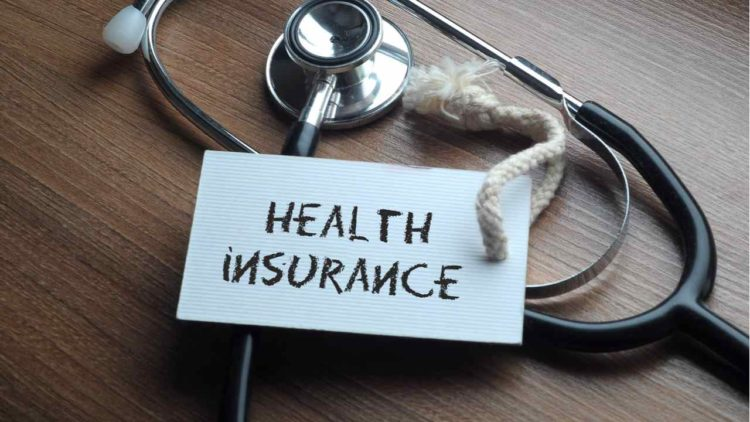

## Problem Statement

The leading Insurance company offers affordable health insurance to thousands of customers. We're tasked with creating an automated system to estimate the annual medical insurance expenditure for new customer, using information such as their age, sex, BMI, children, smoking habits etc.

* Estimates from our system will be used to determine the annual insurance premium charges (amount paid every month) offered to the customer. 

Dataset source: [Kaggle](https://www.kaggle.com/datasets/tajamulkhan/new-insurance-data?select=new_insurance_data.csv)

## Aim

Our objective is to find a way to estimate the value in the "charges" column using the values in the other columns. We can do it using the historical data, then we will estimate charges for new customers, simply by asking for information like their age, sex, BMI, no. of children, smoking habits and region.

## Getting Started

### Import Libraries

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
import math
import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import *

### Loading Data

In [69]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "new_insurance_data.csv"

# Load the latest version
data = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "tajamulkhan/new-insurance-data",
  file_path)

data.sample()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
230,26.0,male,32.49,1.0,no,5955.900727,19.0,807452.0,1735538.616,1.0,75035512.02,northeast,3490.5491


## EDA

In [70]:
# Shows first 5 rows
data.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [71]:
# Shows last 5 rows
data.tail()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,170380500.5,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,201515184.8,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,223644981.3,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,252892382.6,3.0,4.006359e+09,southeast,62592.87309
1337,54.0,female,47.410,0.0,yes,63982.80926,31.0,1100328.0,261631699.3,3.0,4.117197e+09,southeast,63770.42801


In [72]:
# Returns (rows, columns) of the DataFrame
data.shape

(1338, 13)

In [73]:
# Lists all column names
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [74]:
# Summary of columns, data types, and non-null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [75]:
# Summary stats for numerical columns (count, mean, std, etc.)
data.describe()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1329.000000,1335.000000,1333.000000,1324.000000,1332.000000,1.335000e+03,1.334000e+03,1336.000000,1.332000e+03,1338.000000
mean,39.310008,30.665112,1.090773,33361.327180,15.216216,9.100047e+05,1.584179e+07,1.060629,3.696849e+08,13270.422265
std,14.034818,6.101690,1.201856,15617.288337,7.467723,9.188612e+04,2.669305e+07,0.533583,5.668843e+08,12110.011237
min,18.000000,15.960000,0.000000,1920.136268,1.000000,6.954300e+05,2.945253e+04,0.000000,2.747072e+06,1121.873900
25%,27.000000,26.302500,0.000000,20768.860390,9.000000,8.471995e+05,4.077633e+06,1.000000,7.701932e+07,4740.287150
50%,39.000000,30.400000,1.000000,33700.310675,15.000000,9.143000e+05,7.490337e+06,1.000000,1.419361e+08,9382.033000
75%,51.000000,34.687500,2.000000,45052.331957,20.000000,9.716840e+05,1.084082e+07,1.000000,3.243499e+08,16639.912515
max,64.000000,53.130000,5.000000,77277.988480,40.000000,1.107872e+06,2.616317e+08,3.000000,4.117197e+09,63770.428010


In [76]:
# Check for Kurtosis in Target Variable
data['charges'].kurt()


np.float64(1.6062986532967907)

In [77]:
# Check for Skewness in Target Variable
data['charges'].skew()

np.float64(1.5158796580240386)

<Axes: xlabel='charges', ylabel='Count'>

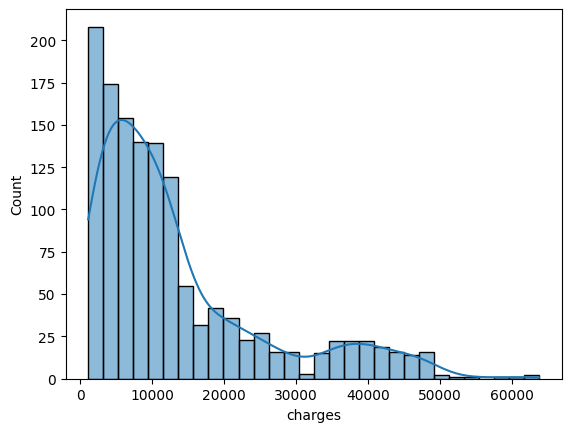

In [78]:
# check distribution of target 
sns.histplot(data['charges'], kde=True)

## Data Preparation

##### **Data Preprocessing Steps**

1. Data Cleaning
    - Handle missing values (e.g., impute with mean/median/mode or drop rows)
    - Remove duplicates
    - Fix typos or inconsistent formatting (e.g., "Male", "male", "MALE")
    - Convert incorrect data types (e.g., string to float)

2. Handling Outliers
    - Use statistical methods like IQR or Z-score
    - Optionally cap or remove extreme values

3. Feature Engineering
    - Create meaningful features from existing data
    - E.g., TotalSpent = MonthlyCharges × Tenure

4. Feature Selection
    - Remove irrelevant, highly correlated, or redundant features
    - Use correlation matrix, feature importance, Lasso, or domain knowledge

5. Encoding Categorical Variables
    - One-Hot Encoding for nominal categories (no order)
    - Label Encoding for ordinal categories (ordered)

6. Splitting the Dataset
    - Split into Train and Test sets (e.g., 80/20 or 70/30)
    - Optional: Further split train into Train and Validation for hyperparameter tuning

7. Feature Scaling (Very Important ✅)
    - Apply only on training data, then use same scaler on test set
    - E.g., StandardScaler, MinMaxScaler
    - This is important for models like KNN, SVM, Logistic/Linear Regression, etc.

8. Balancing the Dataset (for classification tasks, if needed)
Use techniques like:
    - SMOTE (Synthetic Minority Oversampling Technique)
    - Random Oversampling / Undersampling
    - Class Weights in models (like Logistic Regression)
    - Stratified Sampling

### 1. Data Clearning

#### 1a. Data Clearning : Missing Values

* Impute Null with Median when data is inconsistent/ Outliers are Very High
* Impute Null with Mean when Data has less Outliers

In [79]:
# Total missing values per column
data.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

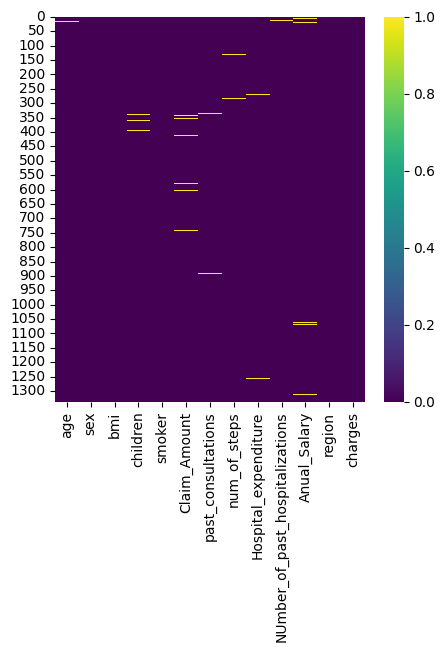

In [80]:
#visualizing null values
plt.figure(figsize = (5,5))
sns.heatmap(data.isnull(), cmap= 'viridis');

In [81]:
# Percentage of missing values per column
data.isnull().mean() * 100

age                                0.672646
sex                                0.000000
bmi                                0.224215
children                           0.373692
smoker                             0.000000
Claim_Amount                       1.046338
past_consultations                 0.448430
num_of_steps                       0.224215
Hospital_expenditure               0.298954
NUmber_of_past_hospitalizations    0.149477
Anual_Salary                       0.448430
region                             0.000000
charges                            0.000000
dtype: float64

#### **Treat Missing Values**

In [82]:
#for float and int values we prefer using mean
#for object type values we prefer using modefor col_name in col:
cols = data.columns

for i in cols:
    if data[i].dtypes == object:
        data[i] = data[i].fillna(data[i].mode()[0])
    else:
        data[i] = data[i].fillna(data[i].mean())

In [83]:
#after mean/median imputation
data.isna().sum()  

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

#### 1b. Data Clearning : Duplicates

In [84]:
# Check Diuplicates 
print(data.duplicated().sum())

0


##### **Treat Duplicates**

In [85]:
# Remove Duplicates
data.drop_duplicates(inplace=True)

#### 1c. Data Clearning : Outliers

- An outlier is a data point that is significantly different from the rest of the data.
- It lies far outside the typical range of values.
- Outliers can negatively impact the performance, accuracy, and stability of machine learning models.

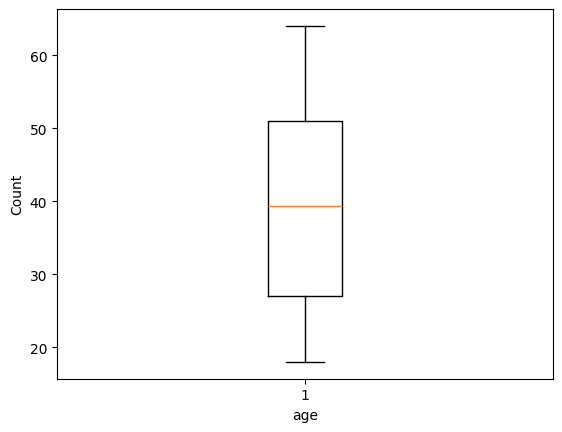

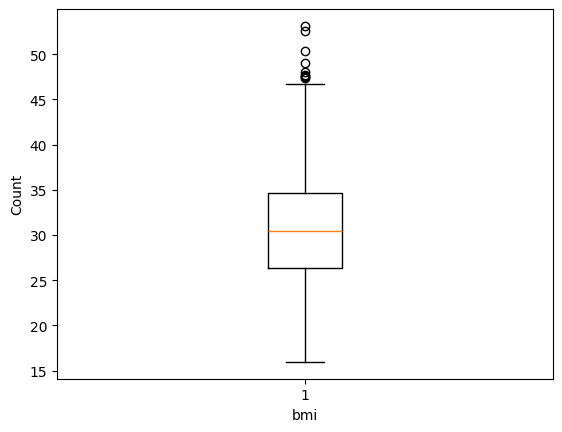

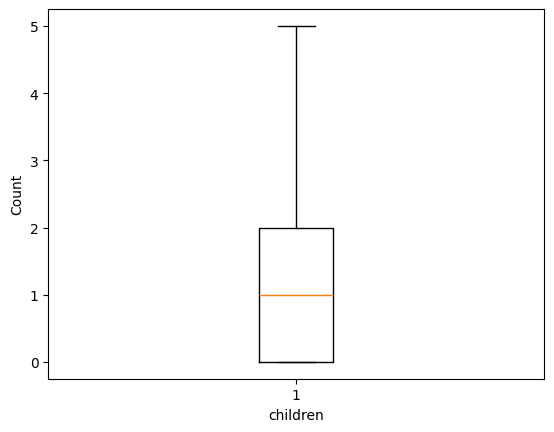

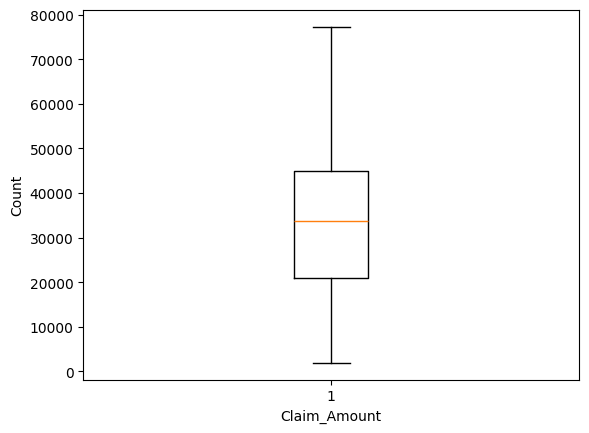

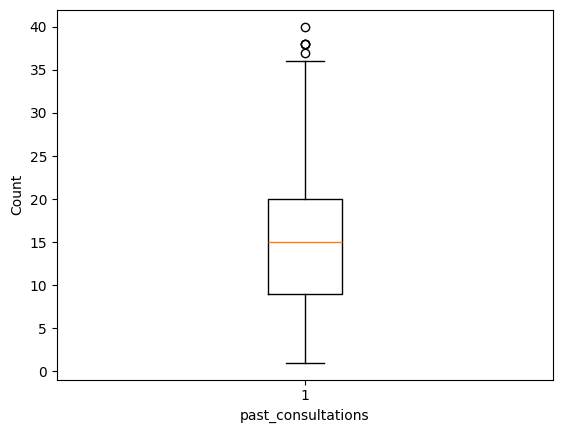

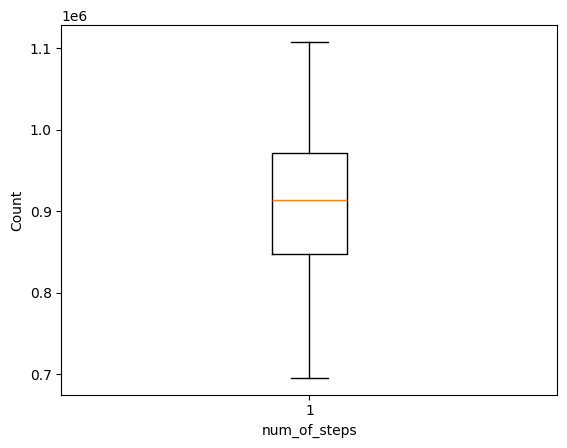

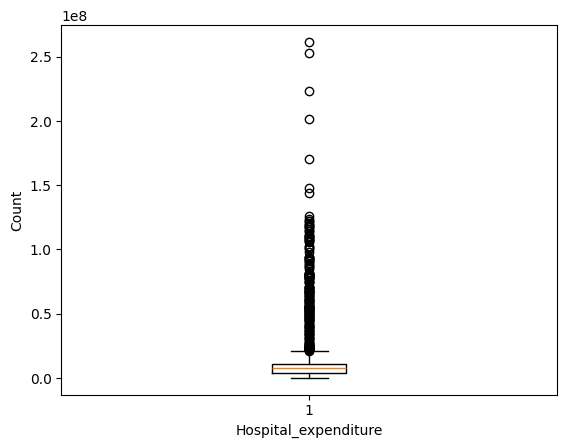

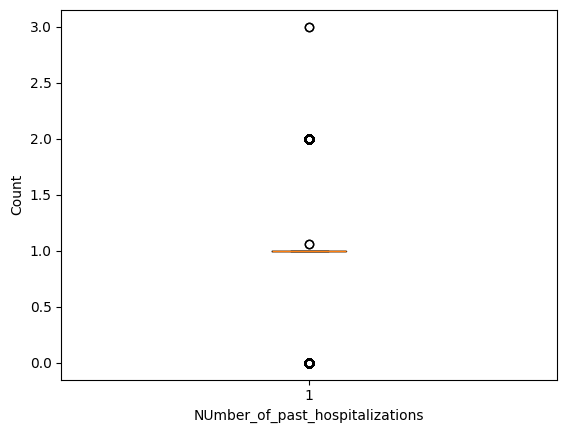

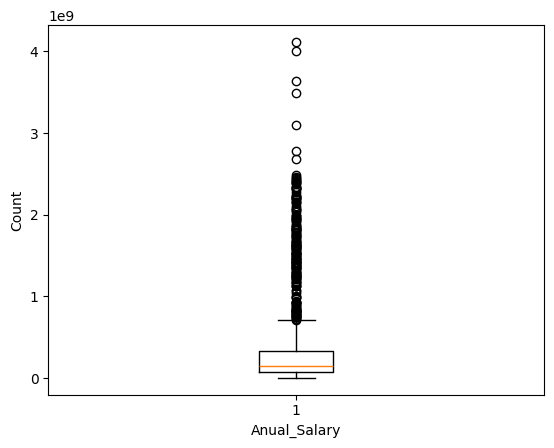

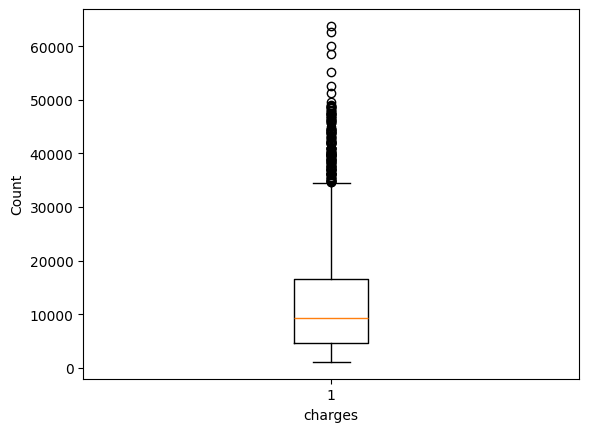

In [86]:
for i in cols:
    if data[i].dtypes == object:
      pass
    else:
      plt.boxplot(data[i])
      plt.xlabel(i)
      plt.ylabel('Count')
      plt.show()

##### **Treat Outliers**

In [87]:
#For Bmi

Q1 = data.bmi.quantile(0.25)
Q3 = data.bmi.quantile(0.75)
IQR = Q3-Q1
data = data[(data.bmi >= Q1 - 1.5*IQR) & (data.bmi <= Q3 + 1.5*IQR)]

In [88]:
#For past_consultations

Q1 = data.past_consultations.quantile(0.25)
Q3 = data.past_consultations.quantile(0.75)
IQR = Q3-Q1
data = data[(data.past_consultations >= Q1 - 1.5*IQR) & (data.past_consultations <= Q3 + 1.5*IQR)]

In [89]:
#For hospital_expenditure

Q1=data.Hospital_expenditure.quantile(0.25)
Q3=data.Hospital_expenditure.quantile(0.75)
IQR=Q3-Q1
data=data[(data.Hospital_expenditure>=Q1 - 1.5*IQR) & (data.Hospital_expenditure<=Q3 + 1.5*IQR)]

In [90]:
#For Anual_Salary

Q1=data.Anual_Salary.quantile(0.25)
Q3=data.Anual_Salary.quantile(0.75)
IQR=Q3-Q1
data=data[(data.Anual_Salary>=Q1 - 1.5*IQR) & (data.Anual_Salary<=Q3 + 1.5*IQR)]

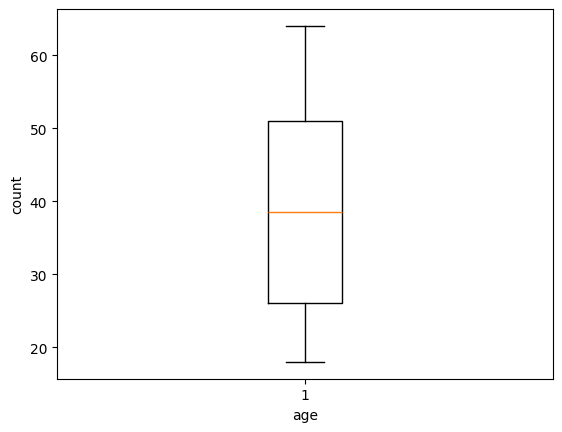

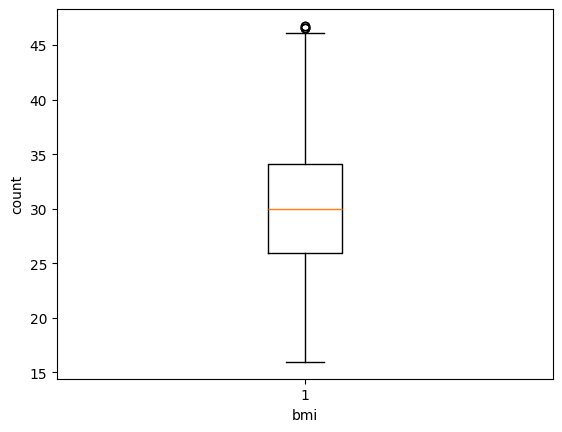

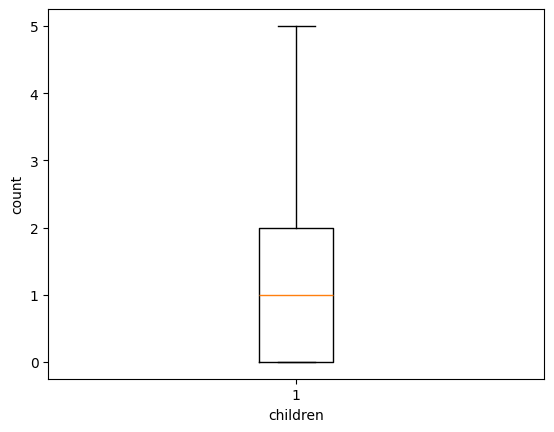

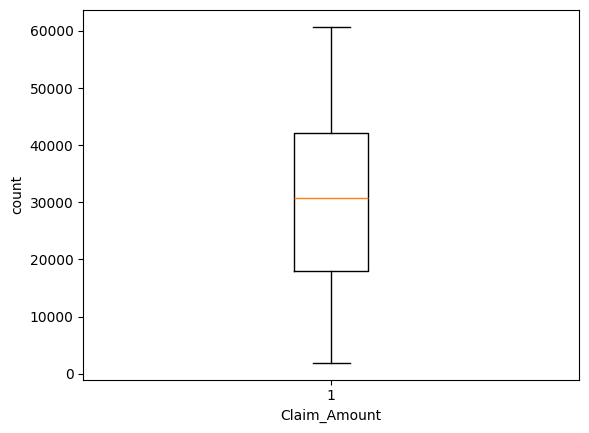

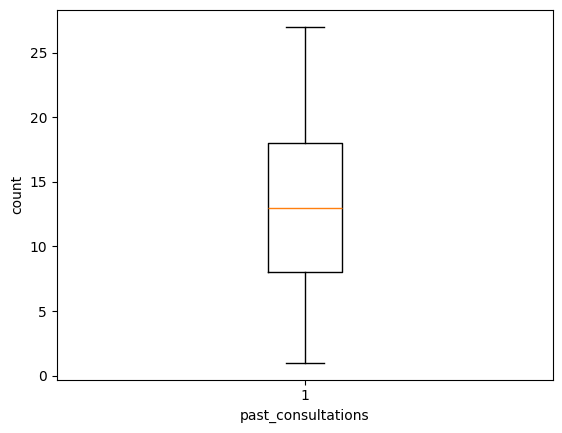

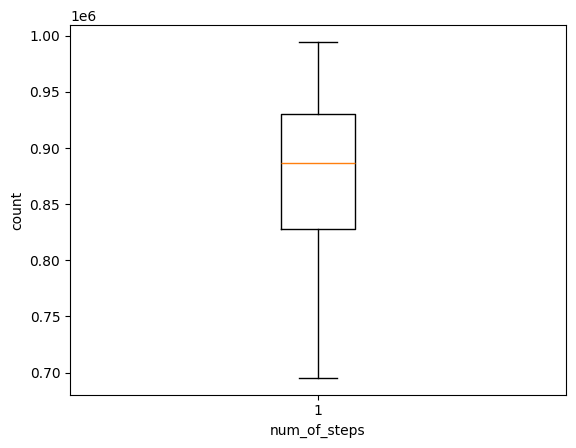

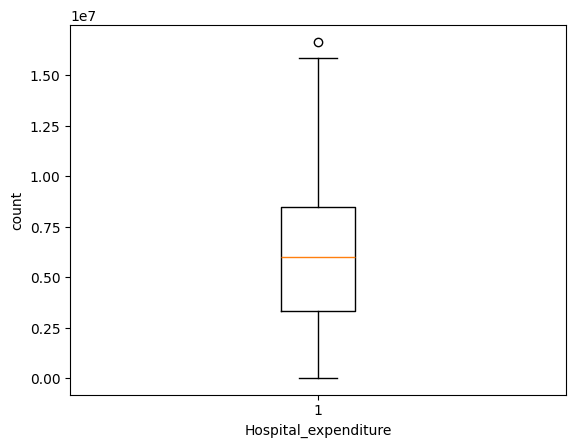

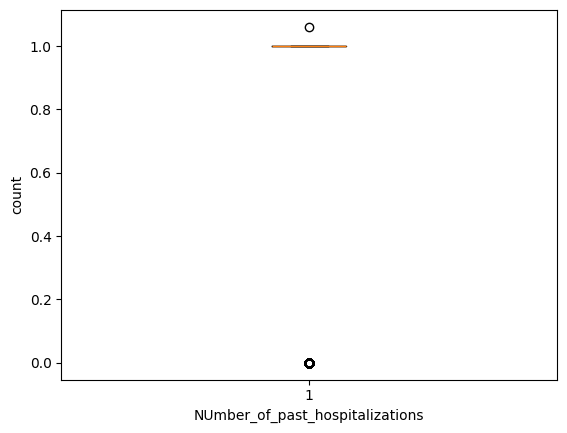

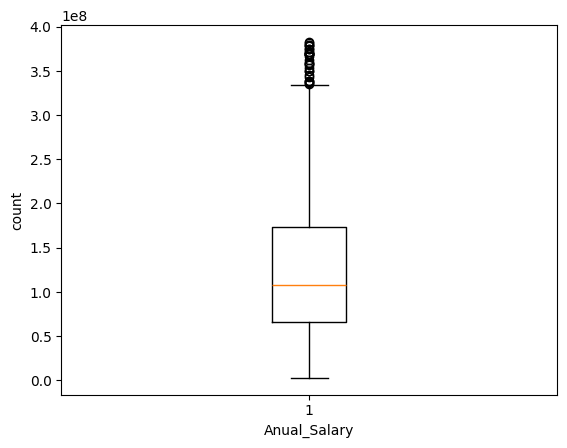

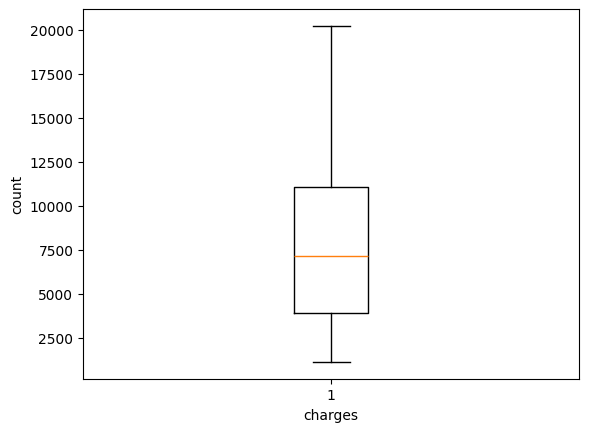

In [91]:
#cheking outliers after treatment 
for i in cols:
    if data[i].dtypes==object:
        pass
    else:
        plt.boxplot(data[i])
        plt.xlabel(i)
        plt.ylabel('count')
        plt.show()

#### 1d. Data Clearning : Multi Collinearity

* Multicollinearity refers to a situation in regression analysis where two or more independent variables (features) are highly correlated with each other.

* we dont want multicollinearity in our dataset

✅ Best Practice:
- Ideal Range: VIF values should generally be less than 5. In stricter scenarios, < 6 is considered safe.

- If VIF > 6: It indicates that the variable is highly correlated with others and may distort the model by inflating standard errors.

➤ Action: Consider removing or combining such variables to reduce multicollinearity.



<Axes: >

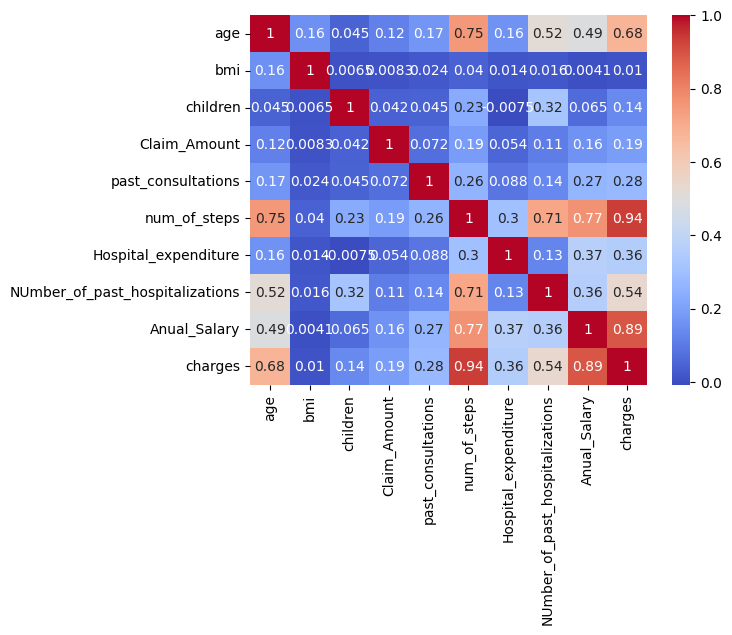

In [92]:
C = data.select_dtypes(include=['number']).corr()
sns.heatmap(data=C, annot=True, cmap='coolwarm')

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [94]:
col_list=[]
for col in data.columns:
    if((data[col].dtypes!=object)):
        col_list.append(col)
        
col_list

['age',
 'bmi',
 'children',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'charges']

In [95]:
X = data[col_list]
X.columns

# Replace inf/-inf with NaN and drop all rows with NaN
X_clean = X.replace([np.inf, -np.inf], np.nan).dropna()

In [96]:
# Compute VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X_clean.columns
vif_data['VIF'] = [variance_inflation_factor(X_clean.values, i) for i in range(X_clean.shape[1])]

print(vif_data)

                           feature        VIF
0                              age  20.448396
1                              bmi  27.840757
2                         children   2.051039
3                     Claim_Amount   5.696103
4               past_consultations   6.265157
5                     num_of_steps  61.630674
6             Hospital_expenditure   5.244698
7  NUmber_of_past_hospitalizations  12.978371
8                     Anual_Salary  20.351387
9                          charges  36.428708


##### **Treat Multicollinearity**

We will either delete or combine columns with high multicollinearity

In [97]:
#dropping columns with high VIF
data=data.drop(['num_of_steps','NUmber_of_past_hospitalizations','age','bmi'],axis=1)

In [98]:
#Comparing to above values of Multi collinearity we have now a reduced score of Collinearity
col_list=[]
for col in data.columns:
    if((data[col].dtypes!=object)&(col!='charges')):
        col_list.append(col)
        
X=data[col_list]

vif_data=pd.DataFrame()
vif_data['feature']=X.columns
vif_data["VIF"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)

                feature       VIF
0              children  1.713101
1          Claim_Amount  4.152224
2    past_consultations  4.670212
3  Hospital_expenditure  4.320876
4          Anual_Salary  4.279483


### 2. Data Splitting

In [99]:
# Independent Variables (Predictors)
X=data.loc[:,['children','Claim_Amount','past_consultations','Hospital_expenditure','Anual_Salary']]

# Dependent Variable (Target)
y=data.iloc[:,-1]

In [100]:
print(X.shape)
print(y.shape)

(1030, 5)
(1030,)


##### **Train Test Split**

- train_size = 0.8 means 80% of the data will be used for training
- random_state = sets the seed for reproducibility; commonly used value is 42

In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)

In [102]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(824, 5)
(206, 5)
(824,)
(206,)


## Model Building

### 1a. Simple Linear Regression

- Linear Regression is a supervised machine learning algorithm used to model the linear relationship between a dependent variable (target) and one or more independent variables (features)

In [103]:
from sklearn.linear_model import LinearRegression

In [104]:
linear_reg=LinearRegression()
linear_reg.fit(X_train, y_train) 

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [105]:
#To get predictions
y_pred=linear_reg.predict(X_test)

In [106]:
from sklearn.metrics import *

In [107]:
# Model Evaluation
linear_reg_mse = mean_squared_error(y_test, y_pred)
linear_reg_rmse = mean_absolute_error(y_test, y_pred)
linear_reg_r2_score = r2_score(y_test, y_pred)

# Evaluation Metrics
print(f"The Mean Squared Error using Linear Regression : ", linear_reg_mse)
print(f"The Mean Absolute Error using Linear Regression : ", linear_reg_rmse)
print(f"The r2_score using Linear Regression : ", linear_reg_r2_score)

The Mean Squared Error using Linear Regression :  2947393.714804552
The Mean Absolute Error using Linear Regression :  1421.6109735327723
The r2_score using Linear Regression :  0.853679810286869


`Here’s a short summary:`
- MSE (2,947,393): Average of squared errors — penalizes big mistakes more.
- MAE (1,421.61): Average absolute error — your model is off by ~1,421 units on average.
- R² (0.854): Model explains 85.4% of the variation — very good fit.

### 1b. Linear Regression with Cross Validation

Cross-validation splits your dataset into multiple parts (folds) — trains the model on some parts and tests it on the remaining parts — to check how consistently the model performs.

Example: 
- In 5-fold cross-validation:
- The data is split into 5 equal parts.
- The model is trained on 4 parts and tested on the 1 left out.
- This repeats 5 times (each part used once as test).
- The final score is the average of all 5 test scores.

In [108]:
from sklearn.model_selection import cross_val_score
# Use neg_mean_squared_error for MSE scoring (must take negative to get actual MSE)
mse_scores = cross_val_score(linear_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

# Convert to RMSE scores (optional)
mse_scores = -mse_scores
rmse_scores = np.sqrt(mse_scores)

print("mse scores:",mse_scores)
print("rmse scores:",rmse_scores)

mse scores: [4562121.09681968 5322456.5543759  3440279.86980881 3289270.3099192
 3325363.66506167]
rmse scores: [2135.91223996 2307.04498317 1854.79914541 1813.63455799 1823.55796866]


`Summary`:
- There's variance in the error values — e.g., Fold 1 has a very high error.

- This may indicate data imbalance, outliers, or a non-uniform distribution of target values across folds.

- On average, your model seems to be performing decently, but one fold (Fold 1) shows significantly worse performance.

In [109]:
# Optional: average MSE and RMSE over folds
mean_mse = mse_scores.mean()
mean_rmse = rmse_scores.mean()

print("Cross-validated Mean Squared Error (MSE):", mean_mse)
print("Cross-validated Root Mean Squared Error (RMSE):", mean_rmse)

Cross-validated Mean Squared Error (MSE): 3987898.2991970517
Cross-validated Root Mean Squared Error (RMSE): 1986.9897790374114


### 1c. Rigde Regression 
Also known as L2 Regularization is a type of linear regression that includes regularization to prevent overfitting.

- It works like linear regression but adds a penalty to the loss function. 
- L2 regularization = λ * β**2 (β = slope) is a hyperparameter

Summary:

✅ Prevents overfitting

✅ Useful when features are highly correlated

❌ Doesn't eliminate features (for that, use Lasso regression)


In [110]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Initialize the Ridge regressor
ridge_reg = Ridge()

# Define the set of alpha values to search
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

# Use GridSearchCV to find the best alpha
ridge_regressor = GridSearchCV(ridge_reg, params, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train, y_train)

# Output the best alpha and corresponding (positive) MSE
print("Best alpha value:", ridge_regressor.best_params_['alpha'])
print("Best MSE:", -ridge_regressor.best_score_)

Best alpha value: 70
Best MSE: 3987149.1489930353


### 1d. Lasso Regression
Also known as L1 Regularization, Lasso is a type of linear regression that adds a penalty to encourage sparsity in the model.

- Like Ridge, it penalizes large coefficients — but instead of squaring them, it uses their absolute value.

- L1 regularization = λ * |β| (β = slope)

This leads to some coefficients becoming exactly zero, which means feature selection happens automatically.

Summary:

✅ Prevents overfitting

✅ Performs feature selection by eliminating irrelevant variables

✅ Useful when we suspect only a few features are important

❌ Can be unstable when predictors are highly correlated (Ridge works better there)

In [111]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Initialize the Ridge regressor
lasso_reg = Lasso()

# Define the set of alpha values to search
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

# Use GridSearchCV to find the best alpha
lasso_regressor = GridSearchCV(lasso_reg, params, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

# Output the best alpha and corresponding (positive) MSE
print("Best alpha value:", lasso_regressor.best_params_['alpha'])
print("Best MSE:", -lasso_regressor.best_score_)

Best alpha value: 0.0001
Best MSE: 3987898.299313548


#### **Final Model Selection**

So, we got different MSE results

- Simple Linear Regression: 2947393.714804552
- Simple Linear Regression (with Cross Validation) : 3987898.2991970517
- Ridge Linear Regression : 3987149.1489930353
- Lasso Linear Regression: 3987898.299313548

💡 What This Means:
- The cross-validated Simple Linear Regression shows a higher error than basic linear regression, indicating potential overfitting on the training data.
- Both Ridge and Lasso reduced the MSE compared to the cross-validated linear model, suggesting that regularization helps improve generalization.
- Ridge performed slightly better than Lasso, meaning that L2 regularization helped reduce overfitting without eliminating features.

✅ Best Choice: Ridge Regression
- It provides the lowest error, effectively handles multicollinearity, and maintains all relevant features.


#### **Best Model Evaluation**

In [112]:
y_pred = ridge_regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.8538562775339146


### 2. Decision Tree Regressor

In [113]:
from sklearn.tree import DecisionTreeRegressor

In [114]:
decision_tree= LinearRegression()
decision_tree.fit(X_train, y_train)

#To get predictions
y_pred1 = decision_tree.predict(X_test)

In [115]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Evaluation Metrics
decision_tree_mse = mean_squared_error(y_test, y_pred)
decision_tree_rmse = np.sqrt(decision_tree_mse)
decision_tree_r2_score = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {decision_tree_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {decision_tree_rmse:.4f}")
print(f"R² Score: {decision_tree_r2_score:.4f}")


Mean Squared Error (MSE): 2943839.0553
Root Mean Squared Error (RMSE): 1715.7619
R² Score: 0.8539


### 3. Random Forest Regressor

In [116]:
from sklearn.ensemble import RandomForestRegressor

random_forest= RandomForestRegressor()
random_forest.fit(X_train, y_train)

#To get predictions
y_pred2 = decision_tree.predict(X_test)

In [117]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Evaluation Metrics
random_forest_mse = mean_squared_error(y_test, y_pred2)
random_forest_rmse = np.sqrt(random_forest_mse)
random_forest_r2_score = r2_score(y_test, y_pred2)

print(f"Mean Squared Error (MSE) using Random Forest Regressor: {random_forest_mse:.4f}")
print(f"Root Mean Squared Error (RMSE) using Random Forest Regressor: {random_forest_rmse:.4f}")
print(f"R² Score using Random Forest Regressor: {random_forest_r2_score:.4f}")

Mean Squared Error (MSE) using Random Forest Regressor: 2947393.7148
Root Mean Squared Error (RMSE) using Random Forest Regressor: 1716.7975
R² Score using Random Forest Regressor: 0.8537


### 4. Gradient Boosting Regressor

In [118]:
gradient_boosting_reg = GradientBoostingRegressor()

gradient_boosting_reg.fit(X_train, y_train)

#To get predictions
y_pred3 = gradient_boosting_reg.predict(X_test)

In [119]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Evaluation Metrics
gradient_boosting_mse = mean_squared_error(y_test, y_pred3)
gradient_boosting_rmse = np.sqrt(gradient_boosting_mse)
gradient_boosting_r2_score = r2_score(y_test, y_pred3)

print(f"Mean Squared Error (MSE) using Gradient Boosting Regressor: {gradient_boosting_mse:.4f}")
print(f"Root Mean Squared Error (RMSE) using Gradient Boosting Regressor: {gradient_boosting_rmse:.4f}")
print(f"R² Score using Gradient Boosting Regressor: {gradient_boosting_r2_score:.4f}")

Mean Squared Error (MSE) using Gradient Boosting Regressor: 2652385.5477
Root Mean Squared Error (RMSE) using Gradient Boosting Regressor: 1628.6146
R² Score using Gradient Boosting Regressor: 0.8683


### 5. KNN Regressor

In [120]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

#To get predictions
y_pred4 = knn.predict(X_test)

In [121]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Evaluation Metrics
knn_mse = mean_squared_error(y_test, y_pred4)
knn_rmse = np.sqrt(knn_mse)
knn_r2_score = r2_score(y_test, y_pred4)

print(f"Mean Squared Error (MSE) using KNN Regressor: {knn_mse:.4f}")
print(f"Root Mean Squared Error (RMSE) using KNN Regressor: {knn_rmse:.4f}")
print(f"R² Score using KNN Regressor: {knn_r2_score:.4f}")

Mean Squared Error (MSE) using KNN Regressor: 3190105.5410
Root Mean Squared Error (RMSE) using KNN Regressor: 1786.0867
R² Score using KNN Regressor: 0.8416


### 6. XGBoost Regressor

In [122]:
xgb = xgb.XGBRegressor()
xgb.fit(X_train, y_train)

#To get predictions
y_pred5 = xgb.predict(X_test)

In [123]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Evaluation Metrics
xgb_reg_mse = mean_squared_error(y_test, y_pred5)
xgb_reg_rmse = np.sqrt(xgb_reg_mse)
xgb_reg_r2_score = r2_score(y_test, y_pred5)

print(f"Mean Squared Error (MSE) using XGBoost Regressor: {xgb_reg_mse:.4f}")
print(f"Root Mean Squared Error (RMSE) using XGBoost Regressor: {xgb_reg_rmse:.4f}")
print(f"R² Score using XGBoost Regressor: {xgb_reg_r2_score:.4f}")

Mean Squared Error (MSE) using XGBoost Regressor: 4046267.4282
Root Mean Squared Error (RMSE) using XGBoost Regressor: 2011.5336
R² Score using XGBoost Regressor: 0.7991


### To Get Best Performing Model

In [124]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Decision Tree', 'Random Forest',
               'Gradient Boosting', 'KNN', 'XGBoost'],
    'RMSE' : [linear_reg_rmse, decision_tree_rmse, random_forest_rmse,
            gradient_boosting_rmse, knn_rmse, xgb_reg_rmse],
    'r2_score' : [linear_reg_r2_score, decision_tree_r2_score, random_forest_r2_score, 
    gradient_boosting_r2_score, knn_r2_score, xgb_reg_r2_score]
})

models.sort_values(by='RMSE', ascending=True)

,Model,RMSE,r2_score
0,Linear Regression,1421.610974,0.853680
3,Gradient Boosting,1628.614610,0.868325
1,Decision Tree,1715.761946,0.853856
2,Random Forest,1716.797517,0.853680
4,KNN,1786.086656,0.841631
5,XGBoost,2011.533601,0.799127


## Conclusion

In this project, we developed a model to estimate annual medical insurance charges based on customer data such as age, sex, BMI, smoking habits, and other factors. After data cleaning, handling missing values, and treating outliers, we performed feature selection and multicollinearity reduction using VIF (Variance Inflation Factor). We then applied several regression models, including Linear Regression, Decision Tree, and Random Forest Regressors, to predict the charges.

Among the models, Linear Regression yielded an R² score of 0.85, indicating a strong relationship between the input features and the target charges. This model provided a solid balance between simplicity and performance. However, further tuning or use of ensemble models like Gradient Boosting may improve accuracy in future iterations. The automated system developed here provides a foundation for estimating insurance premiums, which can be further refined with more complex models or additional data features.

Project Completed by Tajamul Khan
* For More Projects. Check out my [GitHub](https://github.com/tajamulkhann)
* Let's connect over [Linked In](https://www.linkedin.com/in/tajamulkhann/)